In [76]:
import pandas as pd
import datetime
import numpy as np
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
import matplotlib.pyplot as plt

from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 

%matplotlib inline

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## To get Entire Text of a Text Book

In [49]:
text1_text = ' '.join(text1)

## Dispersion Plot

/home/deepshikha/.local/lib/python3.6/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


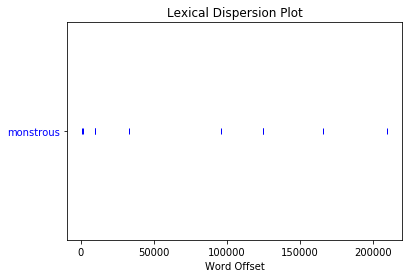

In [15]:
text1.dispersion_plot(['monstrous'])

## Searching Text

A concordance view shows us every occurrence of a given word, together with some context. 

In [4]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


The first time concordance is used on a particular text, it takes a few extra seconds to build an index so that subsequent searches are fast.

In [5]:
text1.concordance('affection')

Displaying 3 of 3 matches:
oyously assented ; for besides the affection I now felt for Queequeg , he was a
e enough , yet he had a particular affection for his own harpoon , because it w
ing cobbling jobs . Lord ! what an affection all old women have for tinkers . I


## Finding Similar words

In [16]:
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [17]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [18]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


## Generating Random Text

In [55]:
text1.generate()

Building ngram index...


long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . have been


'long , from one to the top - mast , and no coffin and went out a sea\ncaptain -- this peaking of the whales . , so as to preserve all his\nmight had in former years abounding with them , they toil with their\nlances , strange tales of Southern whaling . at once the bravest\nIndians he was , after in vain strove to pierce the profundity . ?\nthen ?" a levelled flame of pale , And give no chance , watch him ;\nthough the line , it is to be gainsaid . have been'

In [56]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

A token is the technical name for a sequence of characters 

By wrapping sorted() around the Python expression set(text3) , we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words.

A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary.

 lexical richness of the text = number_of_words_in_a_text / length_of_entire_text

In [57]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [58]:
def percentage(count, total):
    return 100 * count/total

In [59]:
lexical_diversity(text1)

0.07406285585022564

In [60]:
lexical_diversity(text3)

0.06230453042623537

In [61]:
percentage(text1.count('a'), len(text1))

1.7517895552087845

## Frequency Distribution

Frequency Distribution : it tells us the frequency of each vocabulary item in the text. It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. 

In [63]:
f_dist1 = FreqDist(text1)

In [64]:
f_dist1.most_common()

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('mor

In [65]:
f_dist1['Starbuck']

196

Hapaxes : This list contains lexicographer, cetological, contraband, expostulations, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

In [66]:
f_dist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


## Fine Grained Selection of Words

In [67]:
 V = set(text1)

In [68]:
long_words = [w for w in V if len(w) > 15]

In [69]:
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [70]:
fdist5 = FreqDist(text5)

In [71]:
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

## Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

Bigrams :   list of word pairs

In [72]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [78]:
words = [w.lower() for w in text1] 

In [80]:
biagram_collocation = BigramCollocationFinder.from_words(words) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15) 

[("'", 's'),
 (',', 'and'),
 ('of', 'the'),
 ("'", 't'),
 (';', 'and'),
 ('in', 'the'),
 ('.', '"'),
 ('.', 'but'),
 ('."', '"'),
 ('sperm', 'whale'),
 ('moby', 'dick'),
 (',"', 'said'),
 ('to', 'be'),
 ('it', 'was'),
 ('?"', '"')]

In [81]:
f_dist1.tabulate()

                   ,                  the                    .                   of                  and                    a                   to                    ;                   in                 that                    '                    -                  his                   it                    I                    s                   is                   he                 with                  was                   as                    "                  all                  for                 this                    !                   at                   by                  but                  not                   --                  him                 from                   be                   on                   so                whale                  one                  you                  had                 have                there                  But                   or                 were                  now                which              

             pirates              roaring           tremendous            destroyed               weapon            extremity                 nine               Samuel              driving              growing                 damp            principle              cherish                   Go            seemingly                magic              plunged                 pine             mystical                 Jove            Commodore               houses                 spar                  tar                Again             activity                 pure          everlasting              pleased              anxious                paced                  Inn             stopping               opened                 rows               church                 pity               lights                  yea               moored              nervous                 anon                 Time               wildly                  yon              attempt                avast              

              depart               locker               tierce             memories            bitterest             intrepid               craven            perishing        miscellaneous              alleged              veteran                lamps                   De             personal              harvest               assert             operated            momentous              muskets            willingly                dared                Often           adventures                 Peru          enlightened              infancy            threshold                   NO              glowing               walled          possibility              ascribe                regal                  icy              adapted                  ale            steadfast                 tame            reverence         superstition               latent                deeps               reveal               expose               tragic               mounts              toiling              

               Mungo              Siberia            sheepfold            justified           beefsteaks               Enough            digesting        thoroughfares             Broadway               scared              Wapping             chatting               unholy                  sou           bespeaking             bumpkins             frighten               Canaan              opulent         emblematical              mansion            brilliant            chestnuts           candelabra          congregated             terraces            perennial            Elsewhere                sands                    7            Returning             bearskin           worshipper              borders            Patagonia                 1836               TABLET               Memory        _____________                  Off            surviving            solemnity            trappings            unceasing               broods               bosoms                voids             u

            stealing               sashes             puzzling             problems                beset                 leaf           wondrously               evenly                 hare            capacious           cathedrals                lined                hinge           portcullis               proves            imprecate            ringbolts               stumps              chariot              crested                 comb               bonnet          measurement          unfortunate              fissure               curves            calculate                 hogs             bristles              whisker            moustache                 Anne           colonnades            placidity             estimate               slopes           prominence              cranial          development             comprise          inestimable           impotently              bravely       hypothetically           distension          contraction            provision            de

         plentifully            sharpened         surpassingly           despatched           expedition             Stepping              savoury          stultifying             Fishiest              codfish             brindled                  cow                 shod                   nt                    v                   ge                  ILE                 sich              weepons                   16                plans           consulting             everyway             enjoined             purposed          befriending             forecast               relied             sagacity        remonstrances            acquiesce                vigor             trifling              bedroom                 Lent          humiliation                  HOW            liturgies                XXXIX             Articles            inquiries               learnt                DEVIL                  DAM                  TIT                  BIT               PEQUOD           cel

                chasm             beckoned       unsuppressable             scheming         unappeasedly          dissociated       characterizing              vehicle        spontaneously           contiguity           inveteracy           unfathered              vacated       somnambulistic              creates            Affidavit               verity                aimed               cypher           intervened              miasmas      circumnavigated           vanquished             veracity              impeach           cognisable         perilousness              Rinaldo            Rinaldini            cultivate            irascible          unobtrusive            celebrity               renown             Cambyses              scarred                Ombay               Tattoo              Morquan             tortoise                prose             students               Marius                Sylla              classic             creating         Narragansett             

   characteristically         proverbially                penal                 gout           collegians           wickedness          underwriter           turbulence          settlements               harems                sexes                   89          regulations                minor        contingencies              retaken            vexatious             disputes           authorized          legislative            enactment                 1695          legislators                terse             Pandects             Meddling             Business             engraven             forthing              soonest             masterly              brevity              expound                Alive         controllable             occupant            occupants            telegraph               cobweb              ability               knocks                 Coke            Littleton           allowances           scrupulous               trover            litigated             

               shuts            watergate             frenzies                hares             bounding             enslaved                maple      individualities           guiltiness              oneness       outspreadingly             Clinging              wavings              shading             blueness                 Sway              belayed            orchestra              vibrate           discharges               rifles               halloo            bravadoes               salmon                bluer            glittered              glacier            mistiness            Unmindful              ladders            dartingly             excludes         annihilating           manoeuvred              trained             chargers               slogan          untraceable           evolutions            recrossed        foreshortened               hoping          disencumber               snarls               Caught          corkscrewed                fagot              

               18713                13721                 6862                 6536                 6024                 4569                 4542                 4072                 3916                 2982                 2684                 2552                 2459                 2209                 2124                 1739                 1695                 1661                 1659                 1632                 1620                 1478                 1462                 1414                 1280                 1269                 1231                 1137                 1113                 1103                 1070                 1058                 1052                 1030                 1005                  918                  906                  889                  841                  767                  760                  715                  705                  697                  680                  646                  640              

                   5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5                    5              

                   3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3                    3              

                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2                    2             

                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1             

                   1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1              

                   1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1              

                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1                    1             

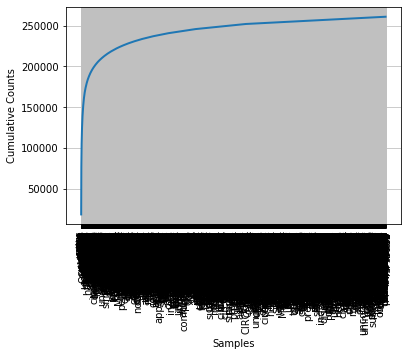

In [82]:
f_dist1.plot(cumulative=True)

In [83]:
s = 'This is a tutorial for NLTK Chapter 01.'

In [84]:
# test if s starts with t
s.startswith('T')

True

In [85]:
s.startswith('H')

False

In [86]:
# test if s ends with t
s.endswith('.')

True

In [88]:
# test if t is a substring of s
'tut' in s

True

In [89]:
# test if s contains cased characters and all are lowercase
s.islower()

False

## Word Sense Disambiguation

- Done to work out which sense of the word was intended in a given context. 
Example of below explains how similar type sentences can mean differently because of the context change
1. The lost children were found by the searchers (agentive)
2. The lost children were found by the mountain (locative)
3. The lost children were found by the afternoon (temporal)

## Pronoun Resolution

- Done to work out who did what to whom i.e. to detect subjects and objects of verbs
Example:
1. The thieves stole the paintings. They were subsequently sold.
2. The thieves stole the paintings. They were subsequently caught.
3. The thieves stole the paintings. They were subsequently found.

## Generating Language Input

- Done in cases of building question answering model, machine translation model
Example:
1. The thieves stole the paintings. They were subsequently found.
2. Les voleurs ont volé les peintures. Ils ont été trouvés plus tard. (the thieves)
3. Les voleurs ont volé les peintures. Elles ont été trouvées plus tard. (the paintings)

In all of these examples, working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are steps in establishing the meaning of a sentence.

## Machine Translation

Machine translation is difficult because a given word could have several possible translations (depending on its meaning), and because word order must be changed in keeping with the grammatical structure of the target language. 

Today these difficulties are being faced by collecting massive quantities of parallel texts from news and government websites that publish documents in two or more languages. Given a document in German and English, and possibly a bilingual dictionary, we can automatically pair up the sentences, a process called text alignment. 

Once we have a million or more sentence pairs, we can detect corresponding words and phrases, and build a model that can be used for translating new text.

## Spoken Dialog Systems

Involves Following Map
Speech Analysis -> Morphological and Lexical Analysis -> Parsing -> Contextual Reasoning -> Applicatopn Reasoning and Execution -> Utterance Planning -> Syntactic Realization -> Morphological Realization -> Speech Syntesis.

## Textual Entailment

The challenge of language understanding has been brought into focus in recent years by a public "shared task" called Recognizing Textual Entailment (RTE). 

The RTE Challenges provide data that allow competitors to develop their systems, but not enough data for "brute force" machine learning techniques (a topic we will cover in chap-data-intensive). Consequently, some linguistic analysis is crucial. 